# Numerical exercises 02


From shell, inside _this_ directory:
- To compile: `make`
- To run the programs: `./execute.sh`

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sympy as sym

from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.style as style 
style.use('tableau-colorblind10')

## Exercise 02.1: Monte Carlo integration with uniform and importance sampling

### The method of importance sampling in Monte Carlo integrals

In this exercise the goal is to calculate the value of an integral using a Monte Carlo method. Furthermore, we want to point out the gain in efficiency given by the **importance sampling** instead of the uniform sampling. 

We consider in particular the following integral:
$$
I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1.
$$
In general, it is always possible to consider the integral as being:
$$
I = \int_0^1 g(x)p(x) dx,
$$
where $p(x)$ is the probability distribution, which is not necessarily the best possible choice for the evaluation of the Monte Carlo integral. A solution can be to introduce a different probability distribution $d(x)$: 
$$
I = \int_0^1 \left[ \frac {g(x) p(x)}{d(x)} \right] d(x) dx,
$$

where $d(x)$ i positive, normalized, and such that: $\int_0^1 d(x)dx \leq \infty$, except on a set of points with zero measure. We can choose it to be as similar as possible to the integrand so that the variance computed with expectation value relative to $d(x)$ is reduced:
$$
\sigma^2_d = \mathbb E \Big[ \Big(\frac {g(x)}{d(x)}\Big)^2 \Big]- \mathbb E \Big[ \frac {g(x)}{d(x)} \Big]^2 = \int_0^1 \left[ \frac {g(x) p(x)}{d(x)} \right]^2 d(x) dx - I^2,
$$
Where, in our specific case, we have considered $p(x)=1$. With the correct choice of $d(x)$, it is possible to minimize the variance without the need of increasing the number of the sample points. A minimization of $\sigma^2_d$, with the normalization of $d(x)$ as a bound, performed with the Lagrange multipliers method, would convince us that the best possible choice of $d(x)$ is $d(x)=g(x)/I$: in fact, this choice would bring us to a $\sigma^2_{d=g/I}=0$. Since the exact value of our integral is known, we could use this sampling, this is not however our purpose.


### Notes on the implementation of the code and results

We have choosen instead the normalized Taylor expansion of $g(x)$ for $x=1/2$ as the probability distribution:
$$
d(x) = 1 + \frac{\pi}{2}\Big(\frac{1}{2}-x \Big),
$$
and we have used the **accept-reject method** to sample this distribution in our code. To implement the method, we have added a new function to the class `Random`.

In the graphs below we compare two sets of results, respectively given by:
- the uniform sampling, with random variables drawn from a uniform distribution on $[0,1)$;
- the importance sampling, with random variables drawn from $d(x)$.

As always, the results are shown using the blocking method: We generate a total of $M$ random variables, we divide them in $N$ blocks of $L$ samples each. We compute an estimate value of $I$ for each block and its uncertaintes. The Central Limit Theorem guarantees that the best result for $i = 1, ..., N$ blocks will be given by the average of the values of the single blocks and the uncertainty will be given by the standard deviation of the average of the $i$ blocks.

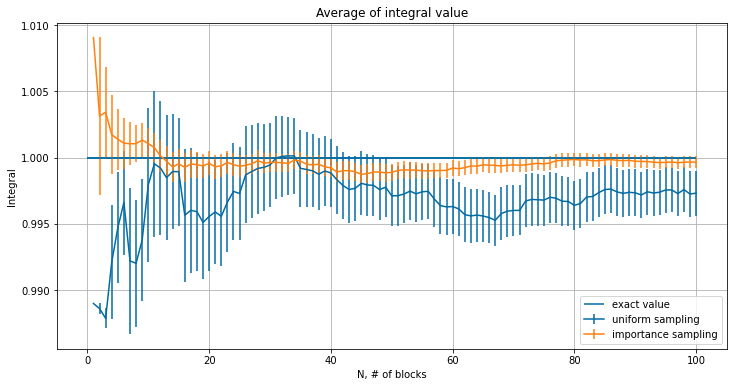

In [3]:
x1, y1, err1 = np.loadtxt("ex2.1/uniform.dat", usecols=(0,1,2), unpack='true')
x2, y2, err2 = np.loadtxt("ex2.1/importance.dat", usecols=(0,1,2), unpack='true')

plt.figure(figsize=(12, 6))
plt.title('Average of integral value')
plt.hlines(1, 0, 100, label='exact value')
plt.errorbar(x1,y1,yerr=err1, label="uniform sampling")
plt.errorbar(x2,y2,yerr=err2,label="importance sampling")
plt.hlines(1, 0, 100)
plt.xlabel('N, # of blocks')
plt.ylabel('Integral')
plt.grid(True)
plt.legend(loc='lower right',)
plt.show()

## Exercise 02.2: Discrete and continuous Random Walk simulation

In this exercise we simulate a **Random Walk** in the **discrete** case, where every step is of length $a=1$ along one of the 3 possible directions on a 3D lattice, and in the **continuous** case, where the direction of the step $a=1$ is selected with a uniform sample of  the solid angle $\theta \in [0, \pi)$ and $\phi \in [0, 2 \pi)$. In particular, the idea was to compute the mean distance $\sqrt{\langle |\vec r_N|^2 \rangle}$ from the origin (the starting point of the walk) in function of the number $N$ of the steps.

To obtain these results, we implemented the abstract base class `RandomWalk`, with the virtual method `walk()` which is inherited by all the two derived classes and respectively specified as follow: 
- `DiscreteW`: to make a step from one cell to one of the six neighboring locations, an integer is drawn from $\{i\}_{i=1}^6$, and the new position is updated;
- `ContinuousW`: to make a step, two angles are drawn from a uniform distribution of a solid angle. The new location of the `RandomWalk` object is updated.

The solid angle uniform distribution has been added as `SolidAngle` method to the `Random` class. It is implemented using the inversion method, to gain in computational speed it would be possible to modify it in order to use the accept-reject method instead.

For every step ($N=100$ total steps) we performed $M=10000$ simulations, as always taking advantage of the CLT and the blocking method to obtain averages and uncertaintes. 

In the graphs we show the results obtained for the mean distance $\sqrt{\langle |\vec r_N|^2 \rangle}$ in function of the steps in the discrete and continuous case. We also show, in red in the graphs, the fit obtained with $f(s)=k\sqrt{s}$. In both of the cases there is a very good compatibility with our results. This is due to the fact that a 3 dimensional random walk can be considered as the superposition of 3 mono dimensional random walks, for which it holds:
$$
X_N = \sum_{i=1}^N p(x_i) x_i, \quad p(x_i) = \frac{1}{2} \big(\delta(x+a) + \delta(x-a) \big).
$$
In this case the mean value $\langle X_N \rangle = 0$ and $\sigma_N^2=Na^2=\langle X_N^2 \rangle$, and it follows that:
$$
\sqrt{\langle |\vec r_N|^2 \rangle} = a \sqrt{N_x+N_y+N_z}= a \sqrt{N_{step}}.
$$
This is an evidence of the diffusional character of random walks: the probability of finding the walker at a certain distance from the origin has a gaussian shape, and its width grows with the square root of the number of steps, as it is for diffusional processes (with $k = \sqrt{2D}$, and $D$ being the diffusive constant defined in the usual differential equation for diffusion processes: $\partial_t p(x,t) = D \partial_x^2 p(x,t)$). 

In the last graph we compare the block averages in the two cases for the $M$ simulations of the last step. As always the CLT ensures that the estimation of the result improves as the number of blocks considered increases.

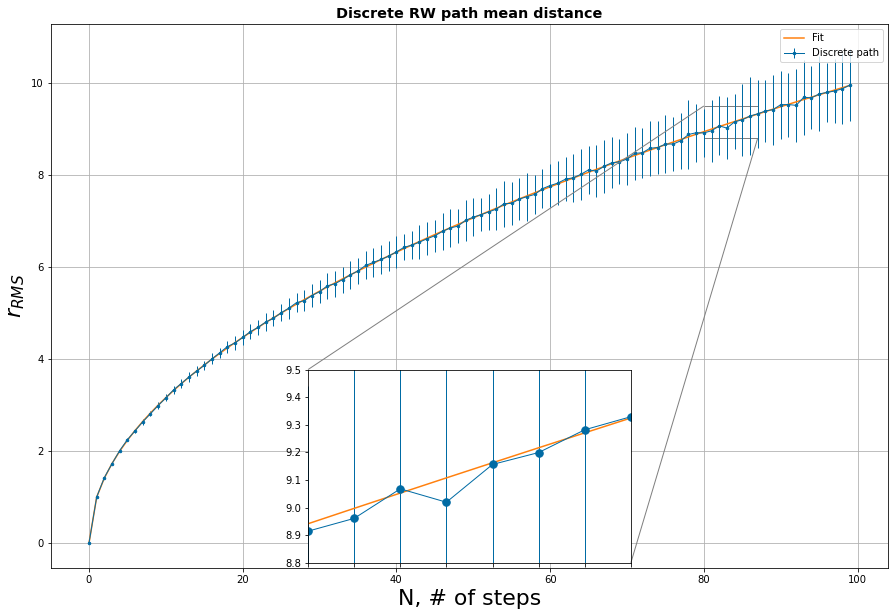

Optimized parameter fit parameter, f(s)=k√s, k =  0.9996884765864006
Parameter's uncertainty =  [1.15580409e-07]


In [5]:
def f (x, k):
    return k * np.sqrt(x)

x,y,err=np.loadtxt("ex2.2/discrete.dat",usecols=(0,1,2),unpack=True)

fig, ax=plt.subplots(figsize=(15, 10))
plt.errorbar(x,y,yerr=err, label='Discrete path', linewidth=1, marker='.', markersize=5)
popt, pcov = curve_fit(f, x, y)
plt.plot(x,f(x,*popt), label='Fit')

plt.xlabel('N, # of steps', fontsize=22)
plt.ylabel('$r_{RMS}$', fontsize=22)
plt.title("Discrete RW path mean distance", size='x-large', weight='bold')
plt.legend()
plt.grid(True)

axins = zoomed_inset_axes(ax, 6, loc='lower center')
axins.errorbar(x,y,yerr=err, label='Discrete path', linewidth=1, marker='.', markersize=15)
plt.plot(x,f(x,*popt), label='Fit')
axins.set_xlim(80,87)
axins.set_ylim(8.8, 9.5)
plt.xticks(visible=False)
plt.yticks(visible=True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.grid(False)
plt.show()


print('Optimized parameter fit parameter, f(s)=k√s, k = ', popt[0])
print ('Parameter\'s uncertainty = ', pcov[0])


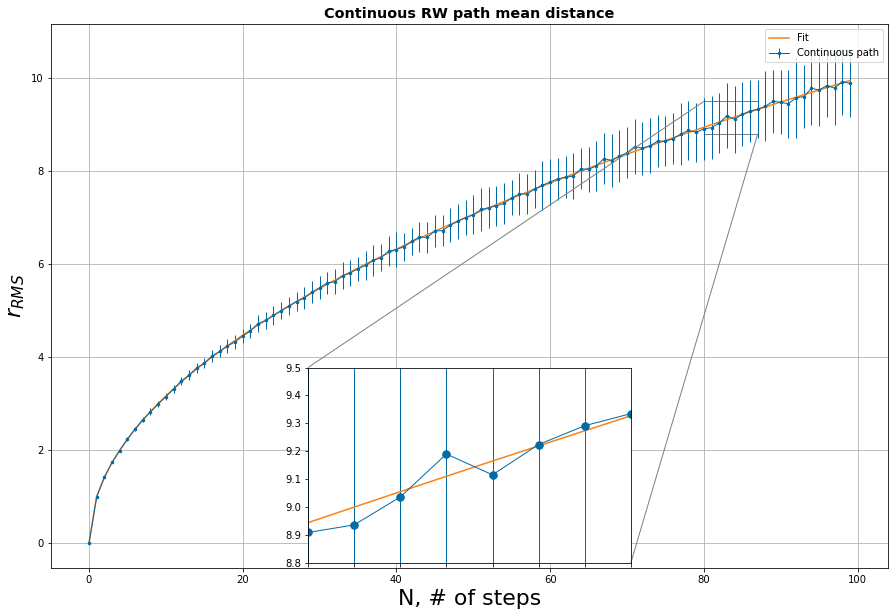

Optimized parameter fit parameter, f(s)=k√s, k =  0.9999666121452341
Parameter's uncertainty =  [2.17824248e-07]


In [7]:
def f (x, k):
    return k * np.sqrt(x)

x,y,err=np.loadtxt("ex2.2/continuous.dat",usecols=(0,1,2),unpack=True)

fig, ax=plt.subplots(figsize=(15, 10))
plt.errorbar(x,y,yerr=err, label='Continuous path', linewidth=1,marker='.', markersize=5)
popt, pcov = curve_fit(f, x, y)
plt.plot(x,f(x,*popt), label='Fit')

plt.xlabel('N, # of steps', fontsize=22)
plt.ylabel('$r_{RMS}$', fontsize=22)
plt.title("Continuous RW path mean distance", size='x-large', weight='bold')
plt.legend()
plt.grid(True)
axins = zoomed_inset_axes(ax, 6, loc='lower center')
axins.errorbar(x,y,yerr=err, label='Discrete path', linewidth=1, marker='.', markersize=15)
plt.plot(x,f(x,*popt), label='Fit')
axins.set_xlim(80,87)
axins.set_ylim(8.8, 9.5)
plt.xticks(visible=False)
plt.yticks(visible=True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.grid(False)
plt.show()

print('Optimized parameter fit parameter, f(s)=k√s, k = ', popt[0])
print ('Parameter\'s uncertainty = ', pcov[0])

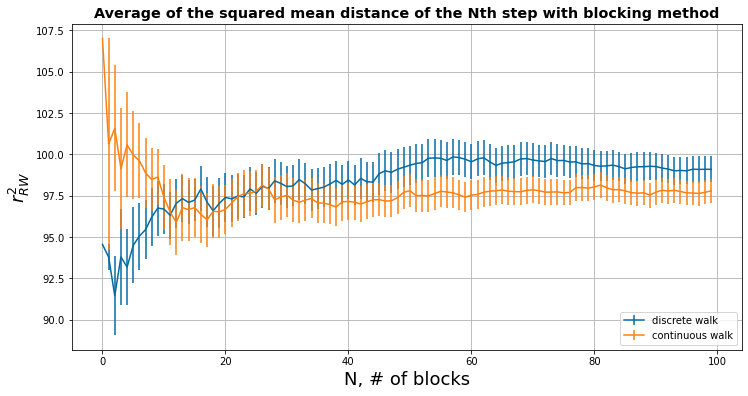

In [8]:
x1, y1, err1 = np.loadtxt("ex2.2/discrete_blocking.dat", usecols=(0,1,2), unpack='true')
x2, y2, err2 = np.loadtxt("ex2.2/continuous_blocking.dat", usecols=(0,1,2), unpack='true')

plt.figure(figsize=(12, 6))
plt.title('Average of the squared mean distance of the Nth step with blocking method', size='x-large', weight='bold')
plt.errorbar(x1,y1,yerr=err1, label="discrete walk")
plt.errorbar(x2,y2,yerr=err2, label="continuous walk")
plt.xlabel('N, # of blocks', fontsize=18)
plt.ylabel('$r_{RW}^2$', fontsize=18)
plt.grid(True)
plt.legend(loc='lower right',)
plt.show()